## To build this Unsupervised Machine Learning Model using K-Means Algorithm, Exploratory Data Analysis was performed first

### This unsupervised machine learning model was built for a bank that has just developed a new product which is intended for a certain cluster of customers. The model adopted K value of 2, and it grouped the customers into two clusters (to market to, and not to market to), and it examined different relevant features to be considered when segmenting the marketing campaigns to the target customers. 

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Bank_full.csv')

In [6]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<AxesSubplot:xlabel='age', ylabel='Count'>

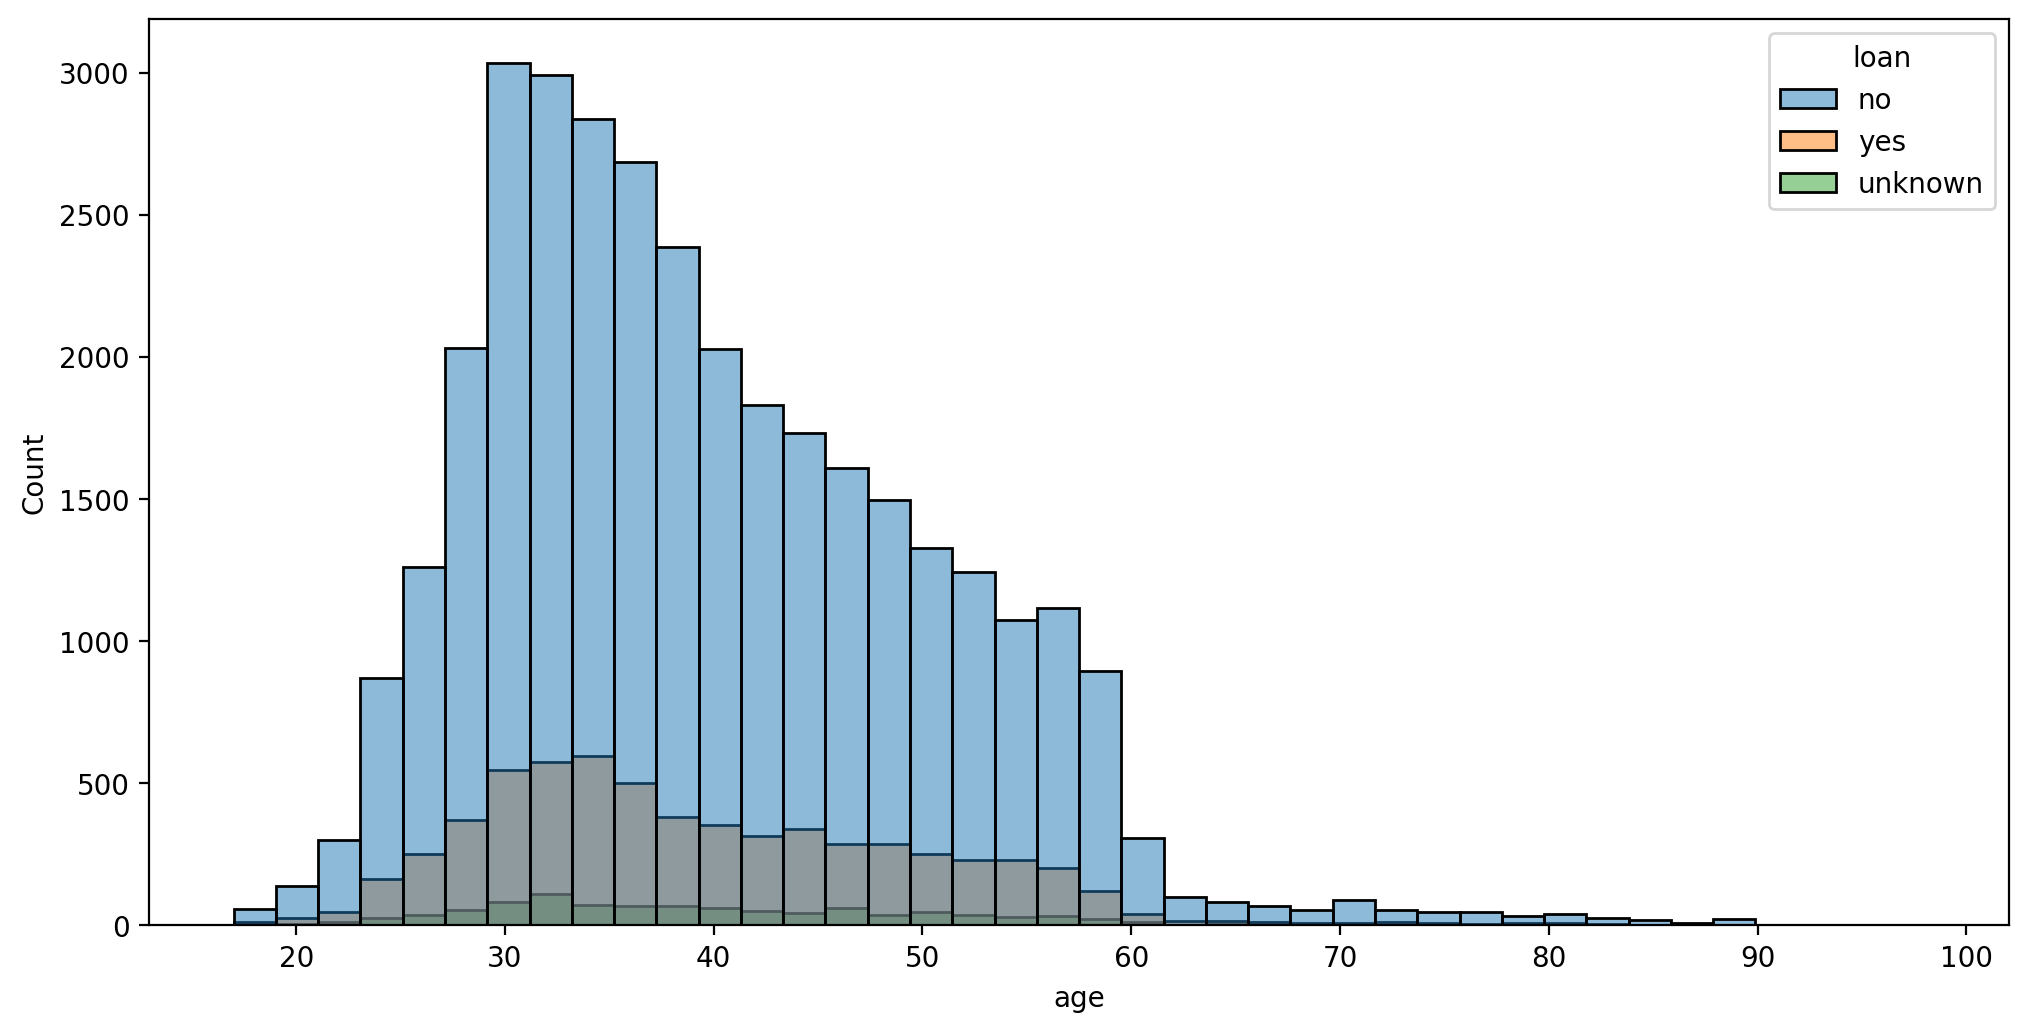

In [10]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='age', bins=40, hue='loan')# most customers targetted for the campaign are btw 30 - 40

<AxesSubplot:xlabel='pdays', ylabel='Count'>

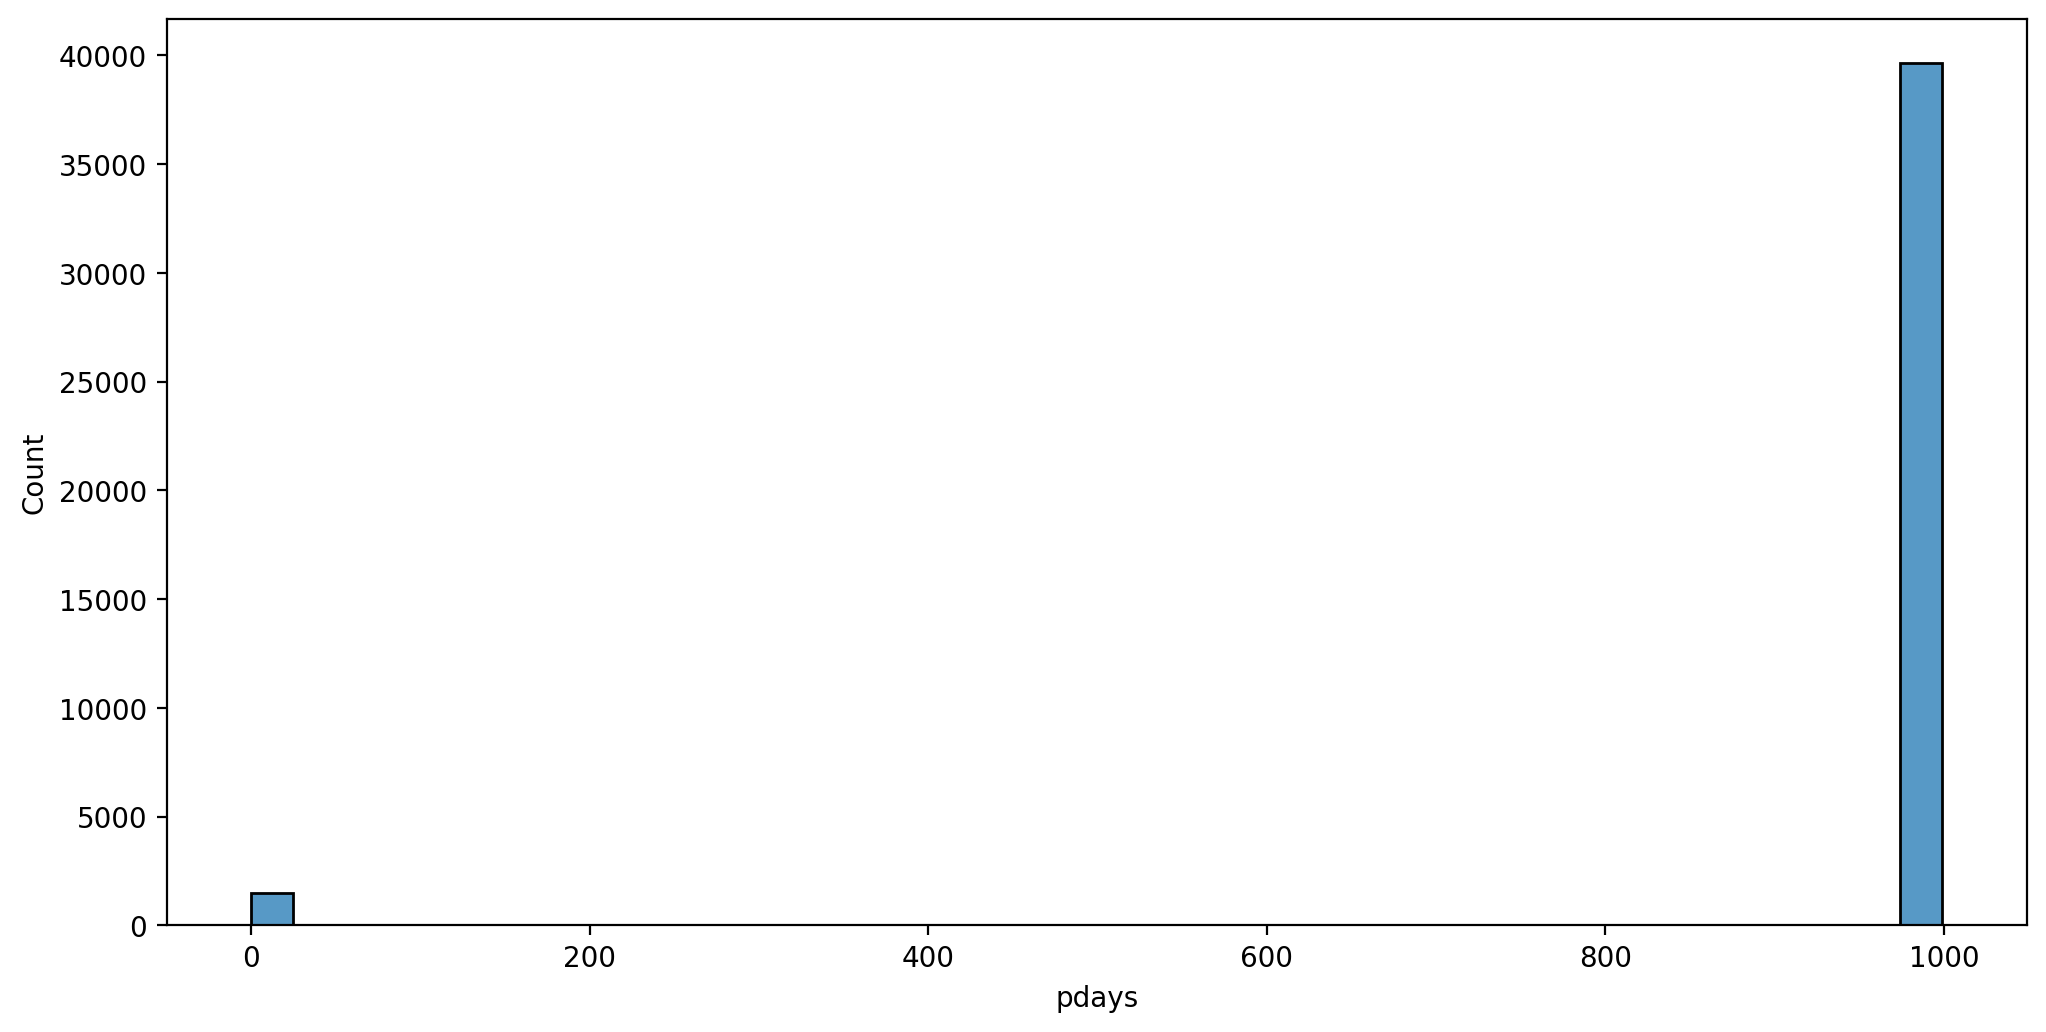

In [11]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='pdays', bins=40)# it shows few people have been contacted for marketing campaigns in the last 999 days

<AxesSubplot:xlabel='pdays', ylabel='Count'>

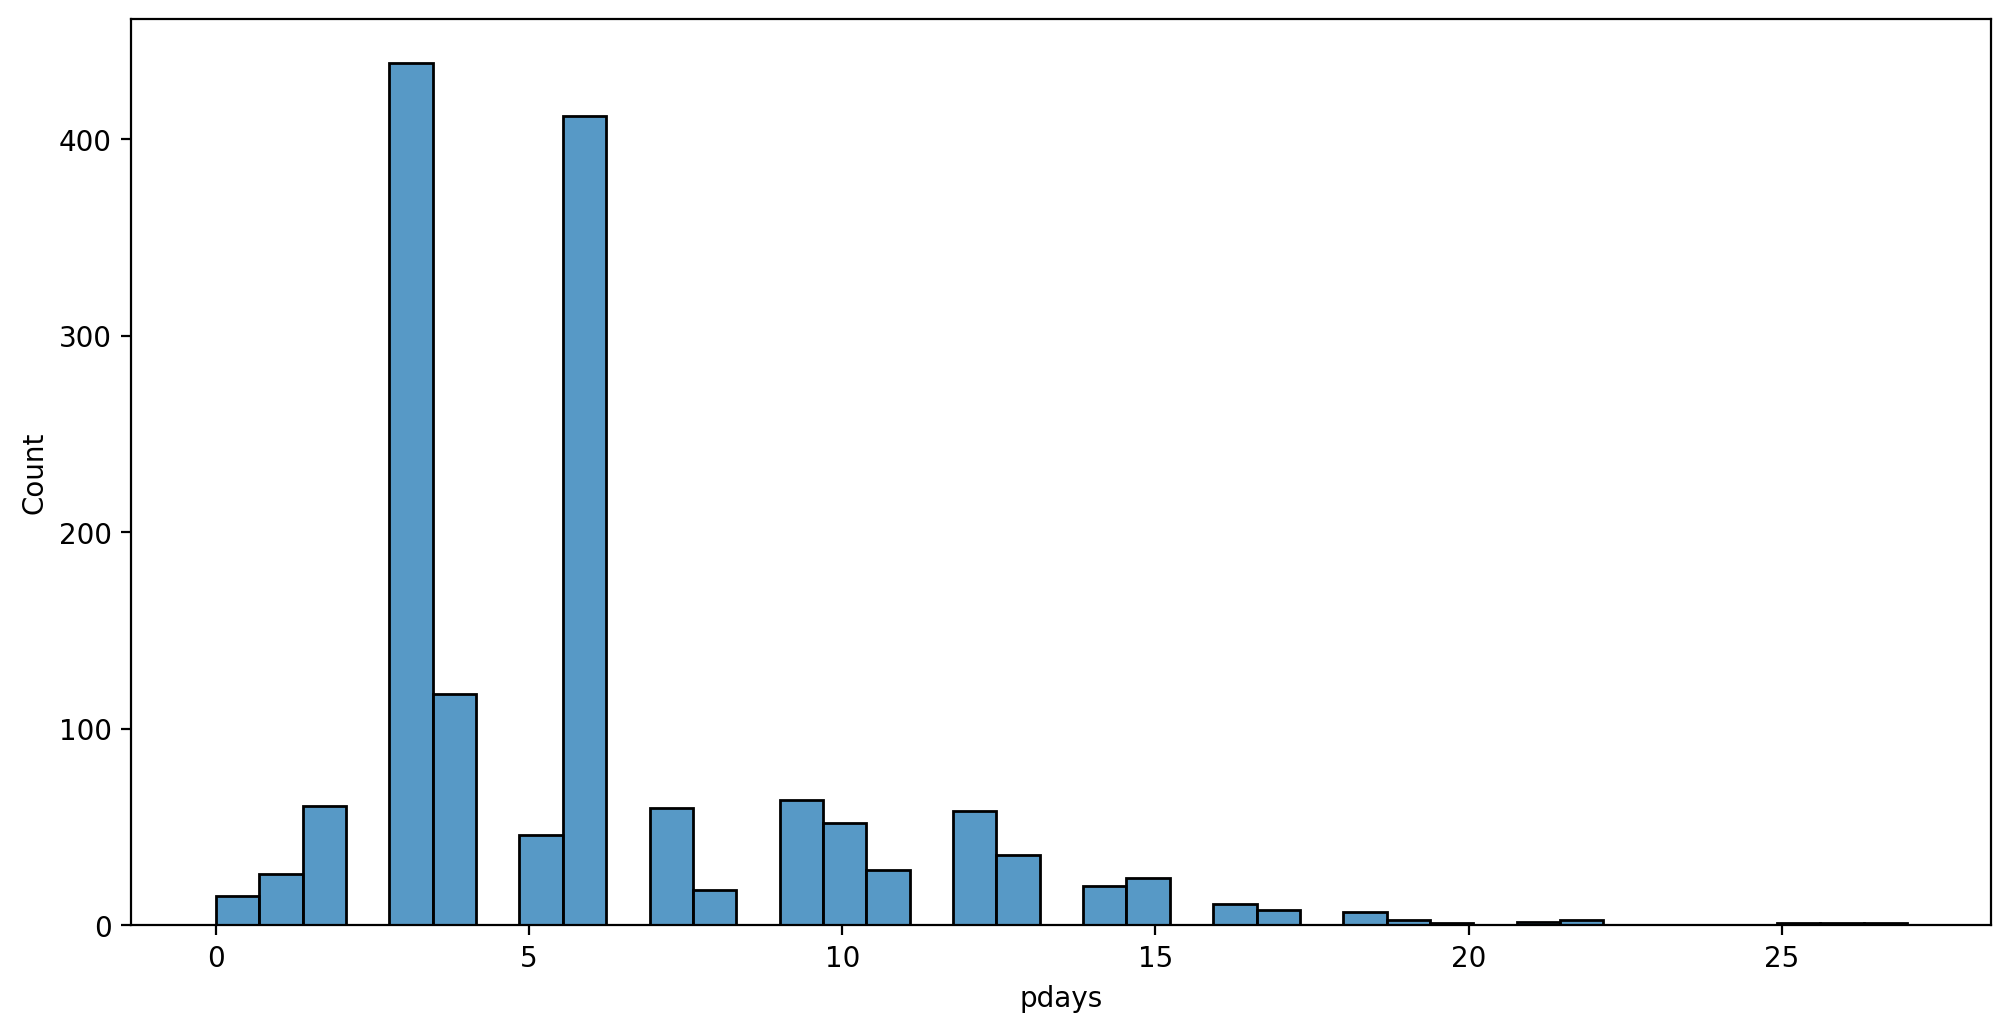

In [12]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df[df['pdays']!=999], x='pdays')# to determine the number of people who have been contacted in the last 999 days

In [13]:
df['contact'].unique()# how the customers were contacted

array(['telephone', 'cellular'], dtype=object)

In [14]:
df['duration']# in seconds

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='Count'>

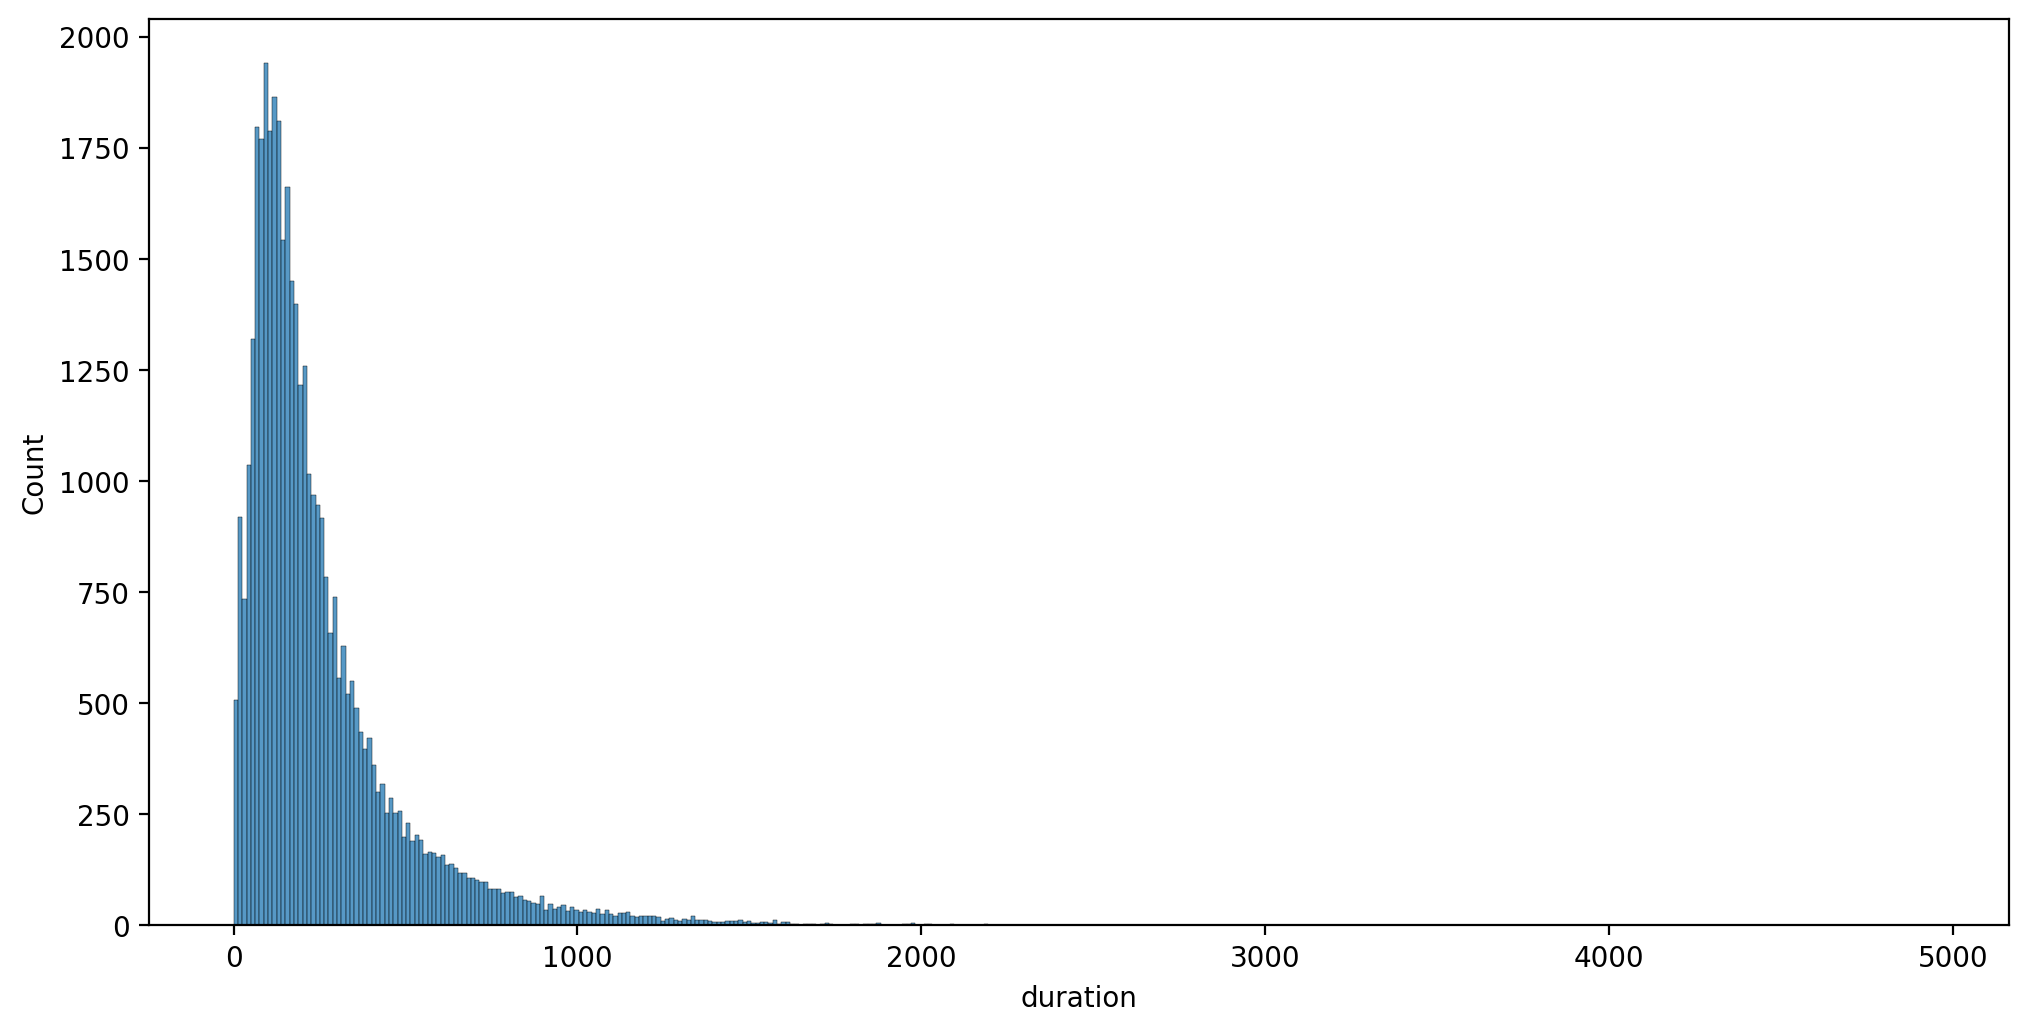

In [15]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='duration')# most people were contacted between 0 and 1,000 seconds(16 mins)

(0.0, 1000.0)

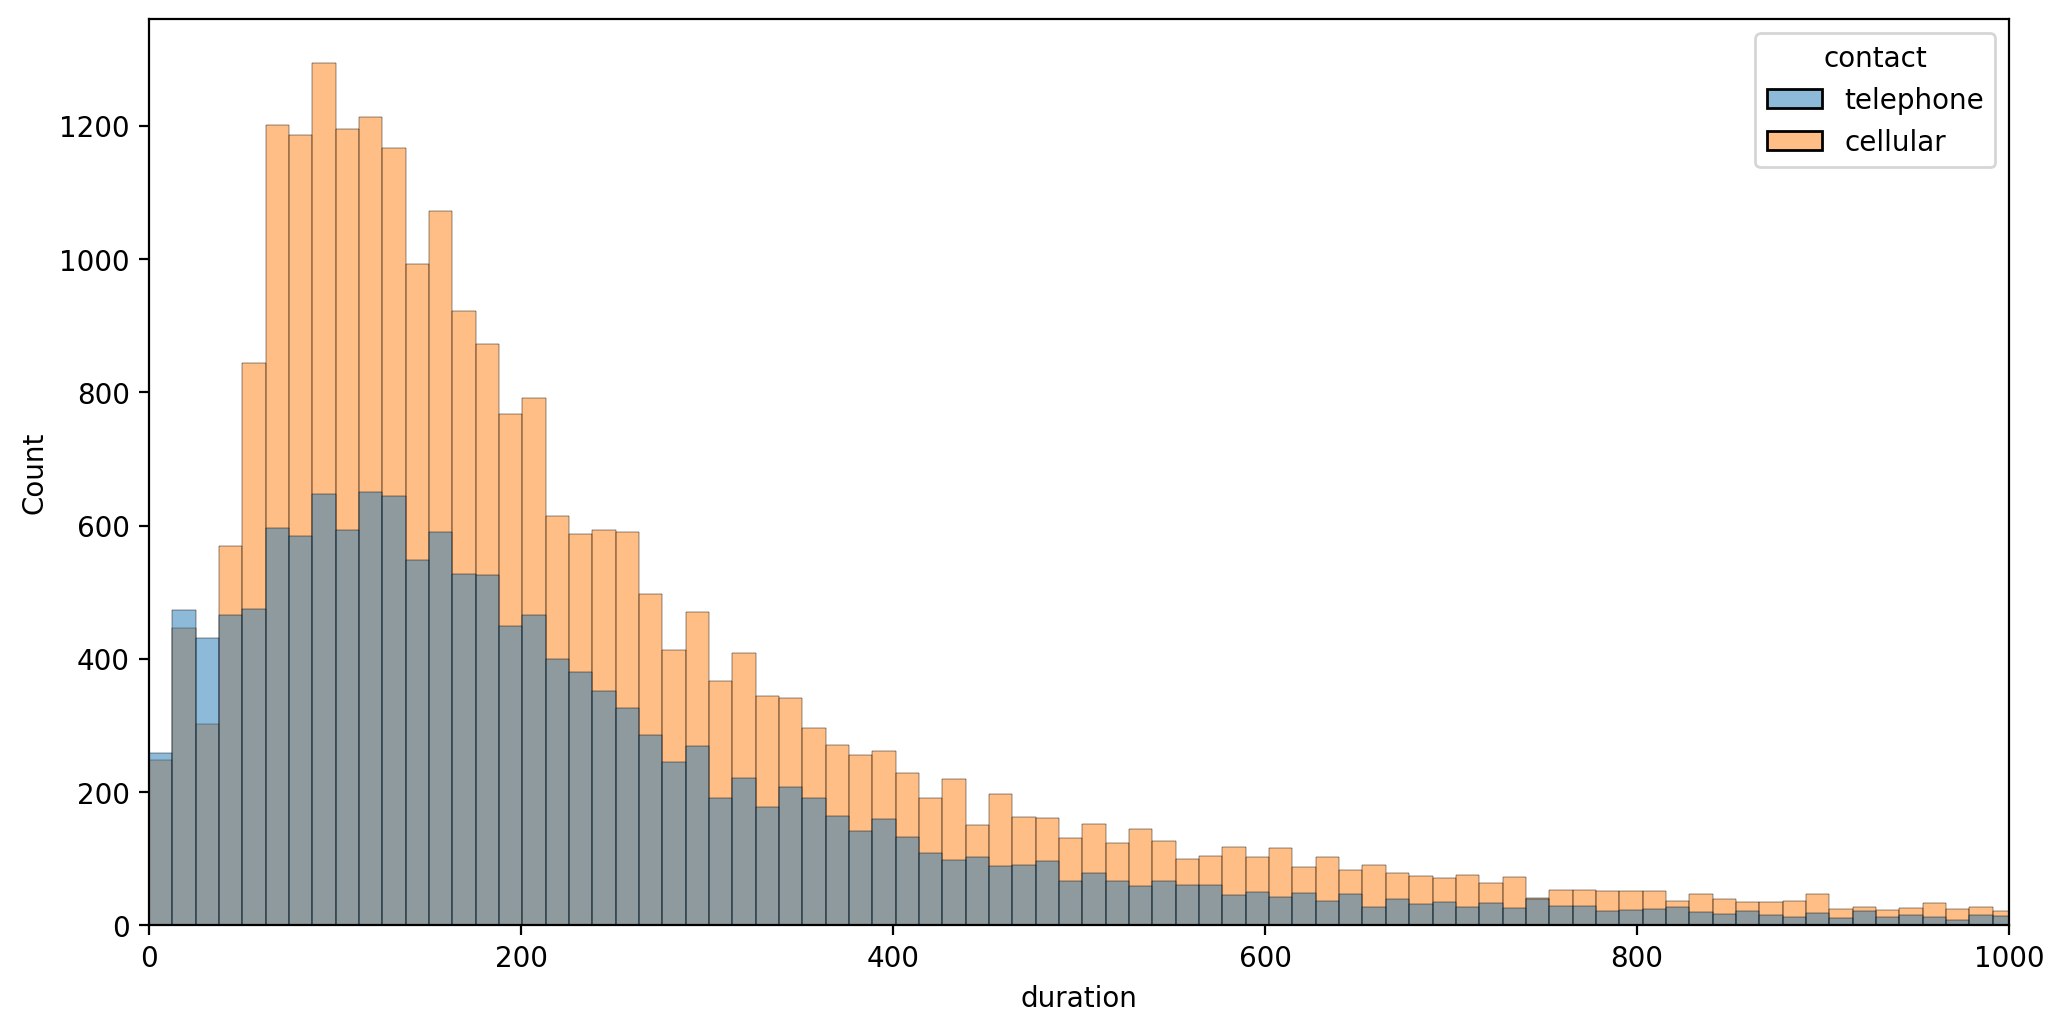

In [16]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='duration', hue = 'contact')# most people were contacted via telephone
plt.xlim(0,1000)

<AxesSubplot:xlabel='contact', ylabel='count'>

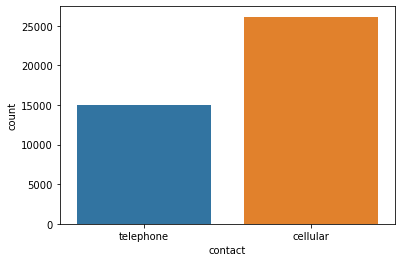

In [17]:
sns.countplot(data=df, x='contact')

In [18]:
df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

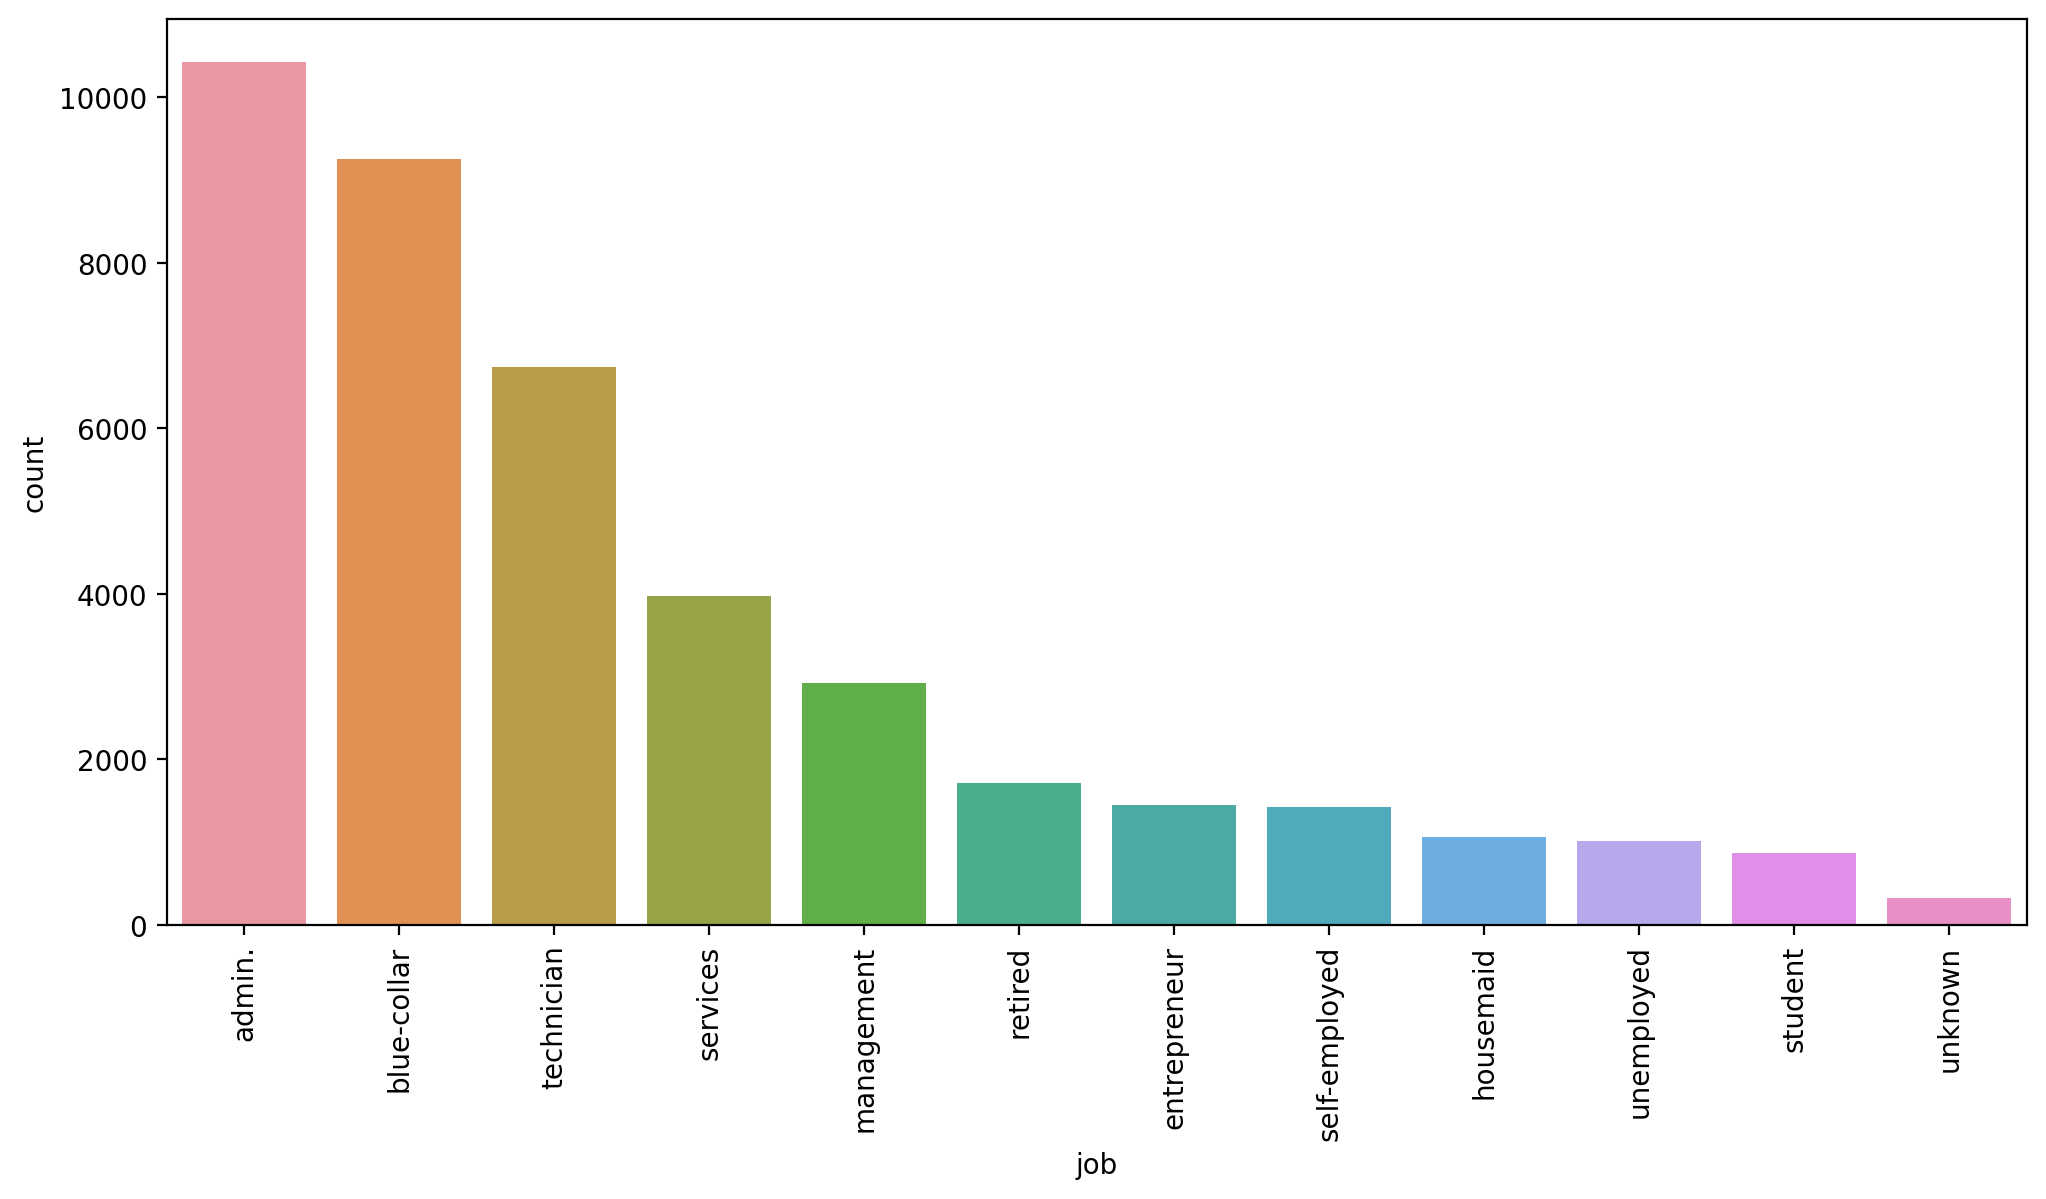

In [19]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='job', order =df['job'].value_counts().index)
plt.xticks(rotation=90);

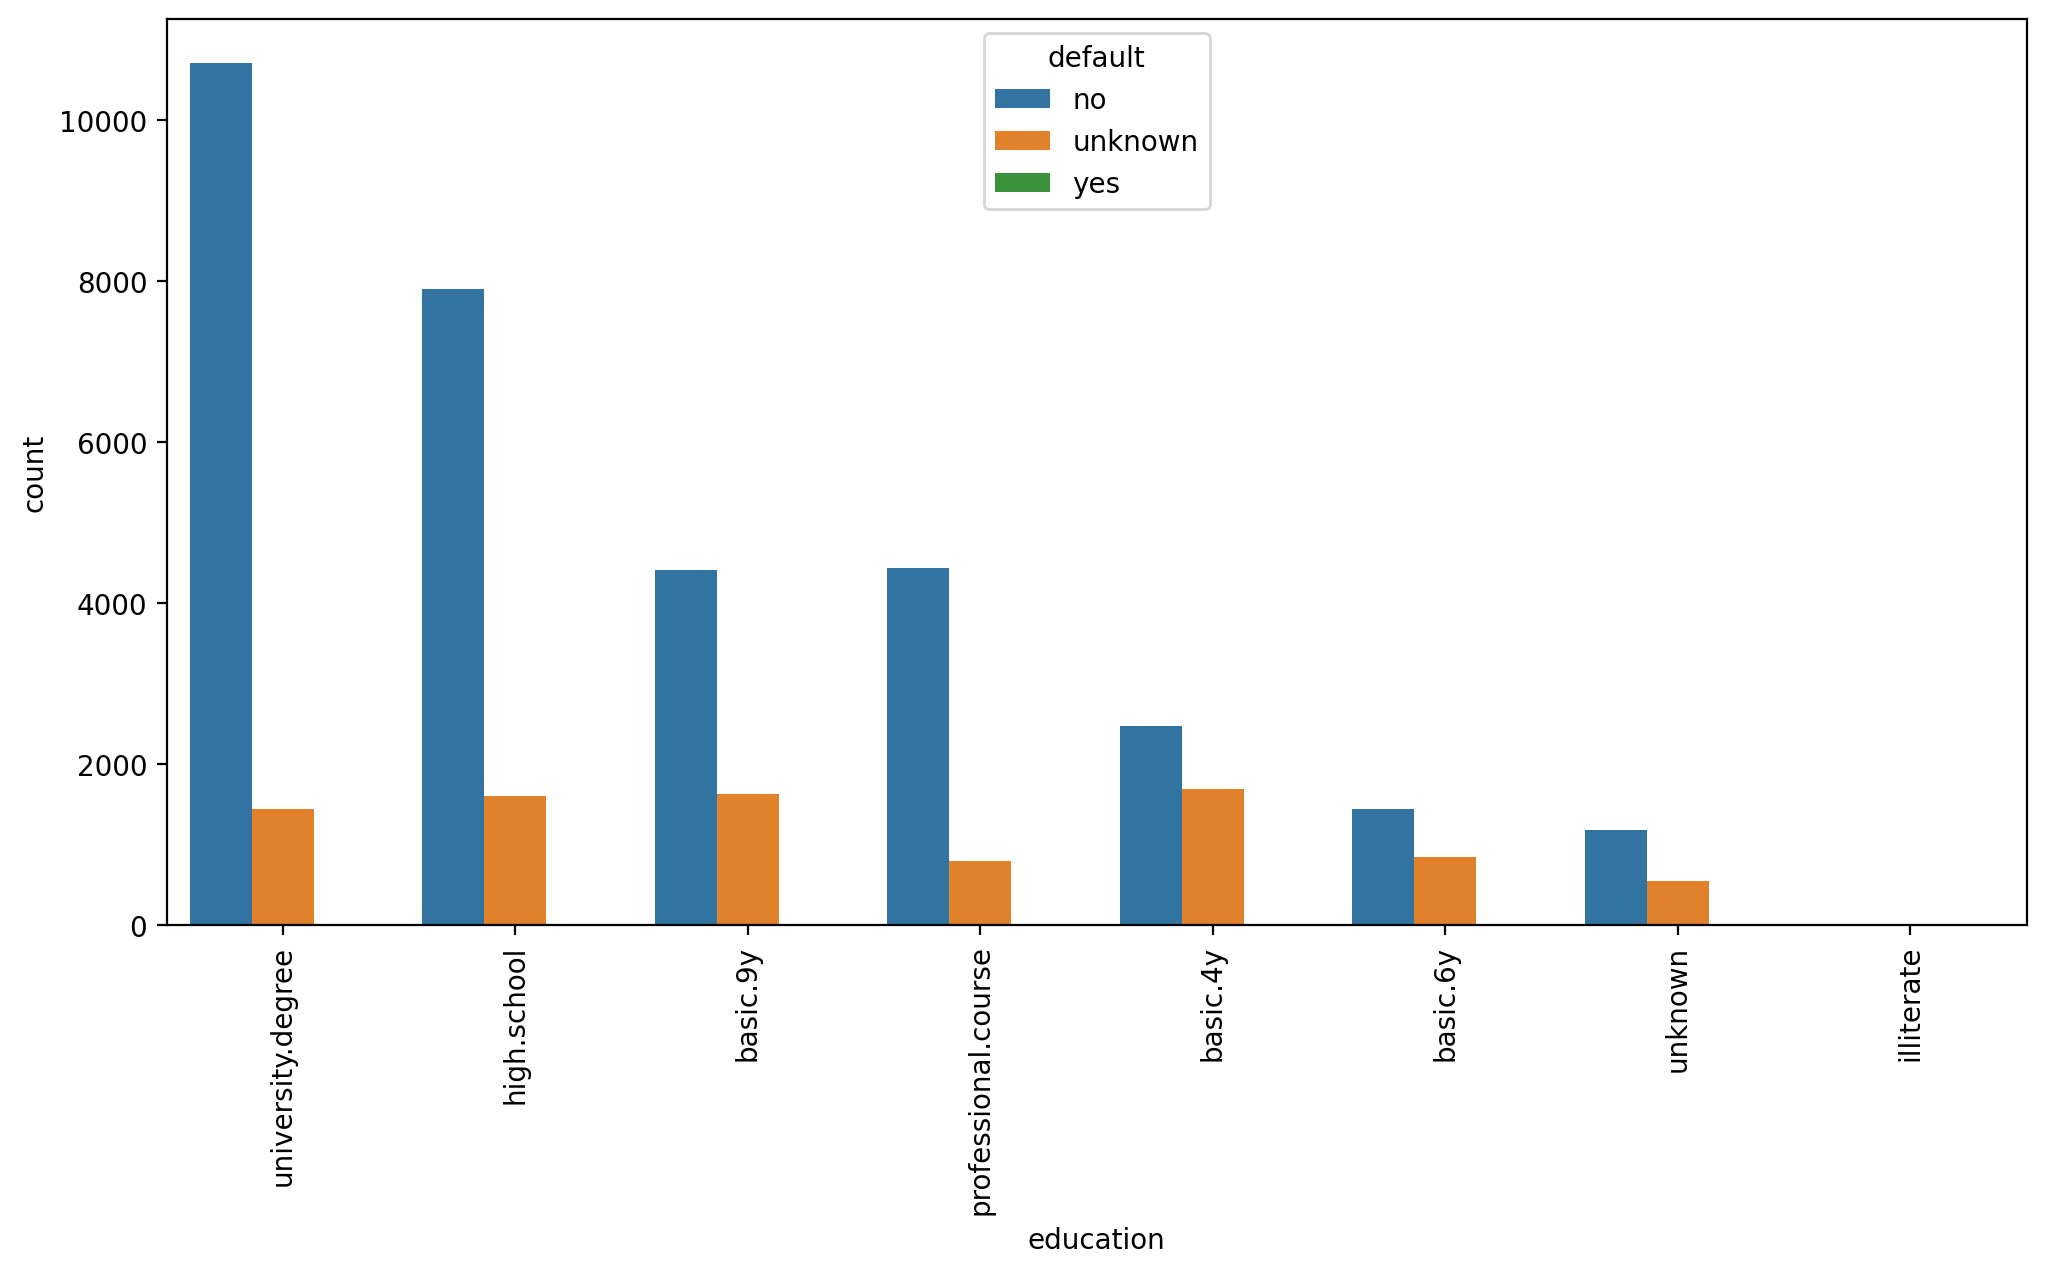

In [20]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='education', order =df['education'].value_counts().index, hue='default')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='default', ylabel='count'>

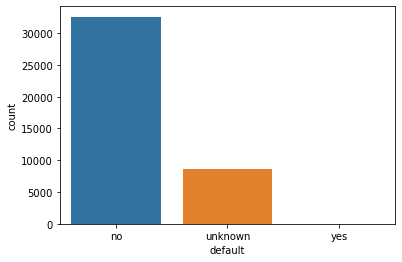

In [21]:
sns.countplot(data=df, x='default')

In [22]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [23]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [24]:
#sns.pairplot(df) the dataset is too large

In [25]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [26]:
X = pd.get_dummies(df)# to drop the columns with categorical values

In [27]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


##### Scaling the data

In [30]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
scaled_X = scaler.fit_transform(X)

In [39]:
from sklearn.cluster import KMeans

In [41]:
#help(KMeans)

In [42]:
Model1 = KMeans(n_clusters=2)# assumed two groups - customers to market to, and not to market to

In [43]:
clusters_label = Model1.fit_predict(scaled_X)

In [46]:
clusters_label

array([1, 1, 1, ..., 0, 0, 0])

In [52]:
X['Cluster'] = clusters_label

In [53]:
X.corr()['Cluster'].iloc[:-1]
# drop the Cluster using .iloc and leaving subscribed no as the direct opposite of yes

age                     0.019767
duration               -0.039581
campaign                0.129103
pdays                   0.267714
previous               -0.478493
                          ...   
poutcome_failure       -0.464320
poutcome_nonexistent    0.544406
poutcome_success       -0.254406
subscribed_no           0.294472
subscribed_yes         -0.294472
Name: Cluster, Length: 65, dtype: float64

In [55]:
X.corr()['Cluster'].iloc[:-1].sort_values()# KMeans actually examines how correlated the results are to the cluster assignment

previous               -0.478493
poutcome_failure       -0.464320
contact_cellular       -0.410444
month_apr              -0.357942
subscribed_yes         -0.294472
                          ...   
poutcome_nonexistent    0.544406
cons.price.idx          0.679350
nr.employed             0.886190
emp.var.rate            0.932622
euribor3m               0.959328
Name: Cluster, Length: 65, dtype: float64

<AxesSubplot:>

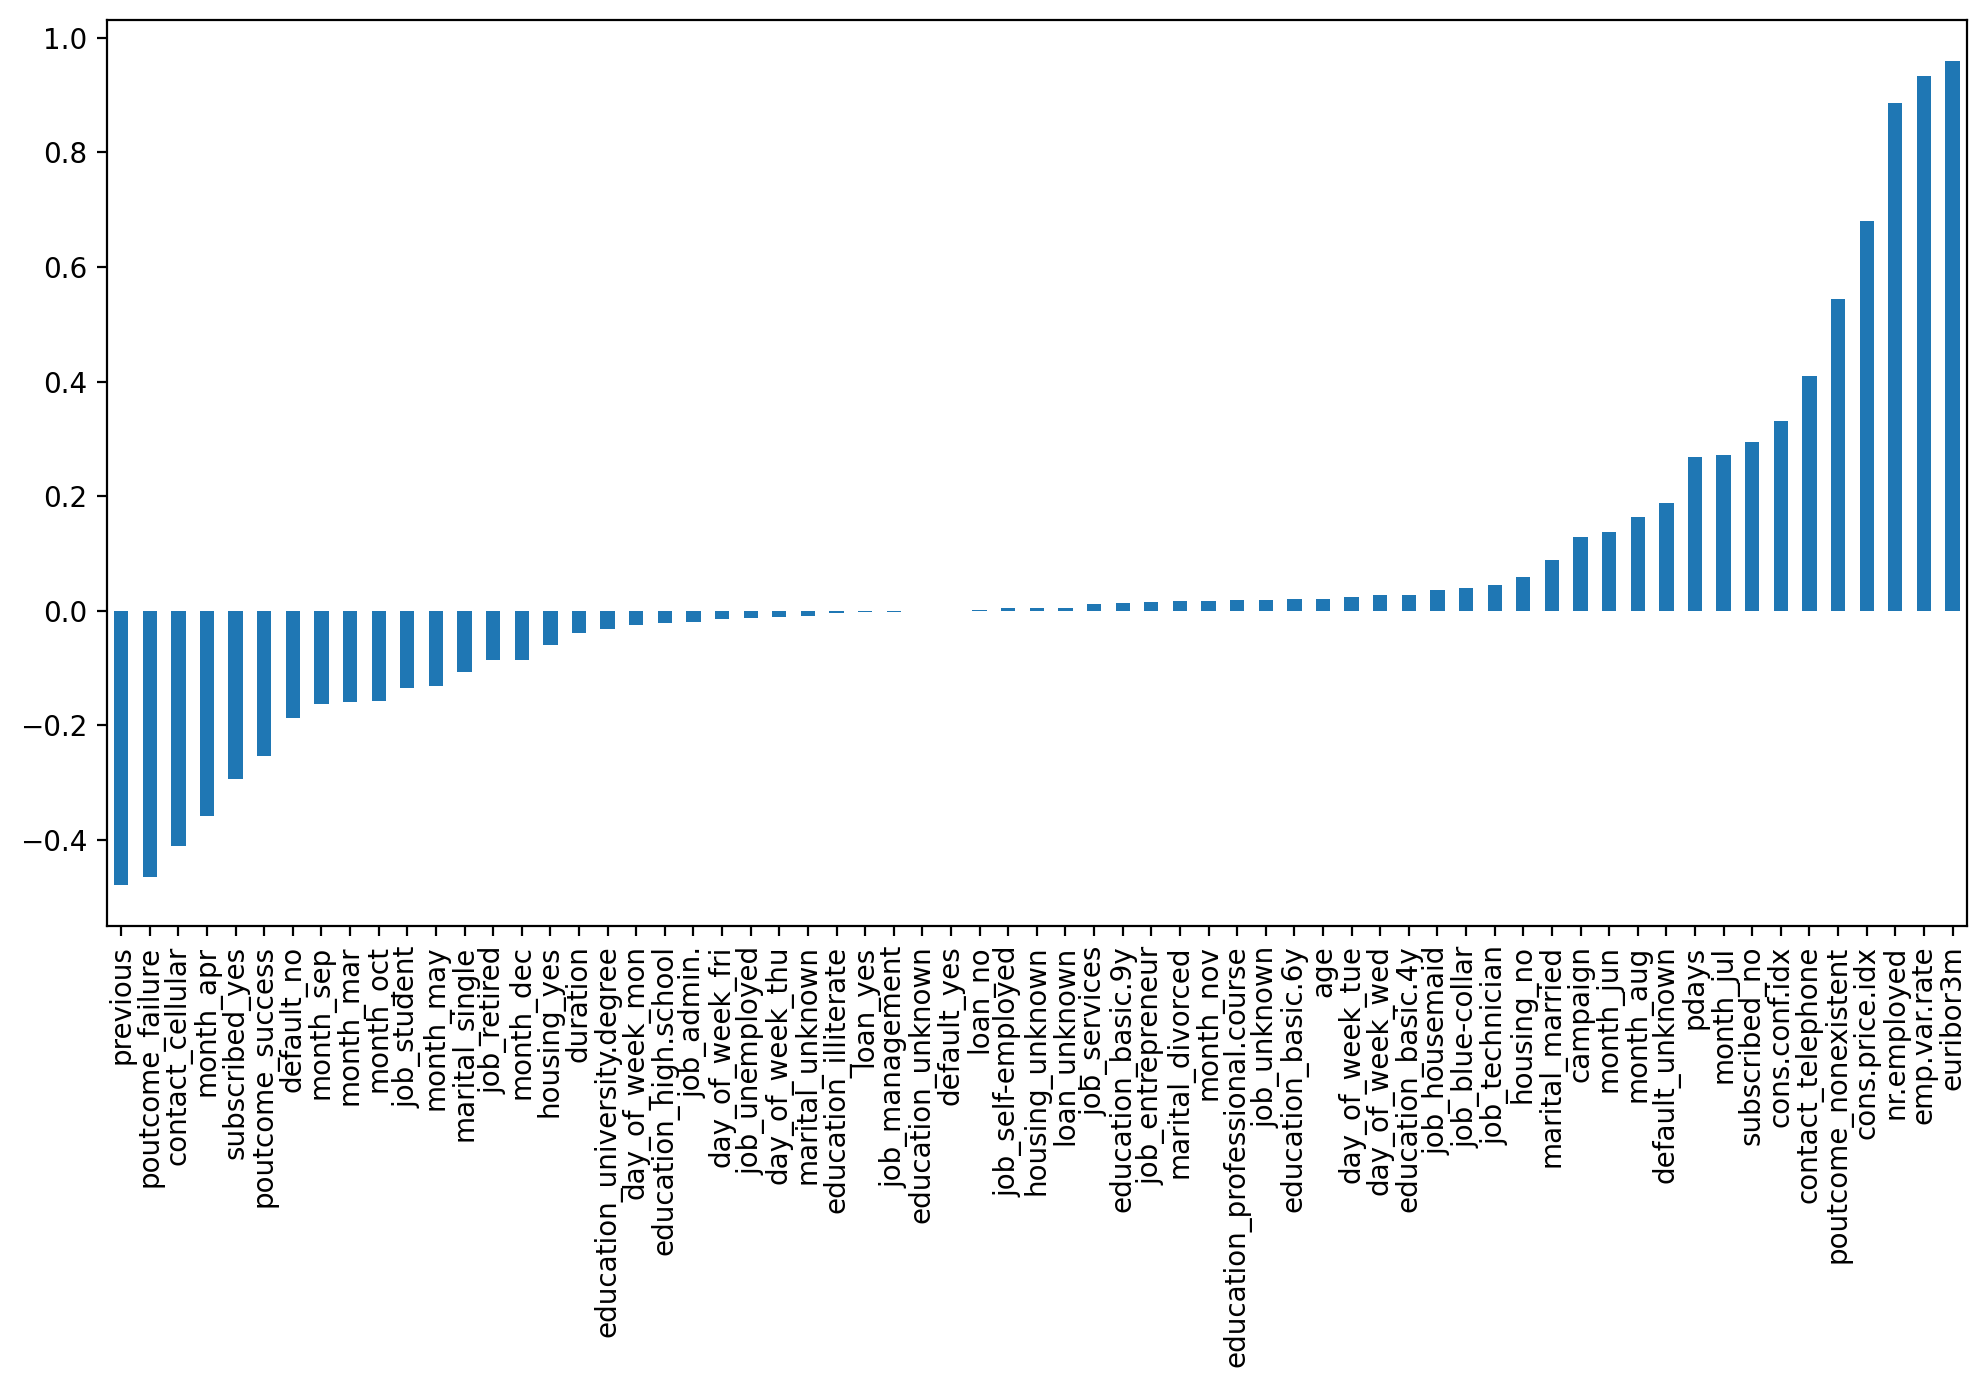

In [58]:
plt.figure(figsize=(12,6), dpi=200)#K = 2 means the data has been divided into two and it shows the features that are important to the cluster assignment. Domain knowledge is required to understand these features
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

## Testing the Model to know if the adopted K value is appropriate

In [64]:
ssd = []

for k in range(2,10):
    
    Model1 = KMeans(n_clusters=k)
    Model1.fit(scaled_X)
    
    ssd.append(Model1.inertia_)#sk-learn model. sum of square distances(ssd) of a point to its assigned squared center

In [65]:
ssd# a sharp decline in the differences from 6

[2469792.381034953,
 2370786.4293325786,
 2271502.934394831,
 2228478.9519388303,
 2143252.3371572774,
 2115237.5576406303,
 2029347.6979756628,
 2010307.220379829]

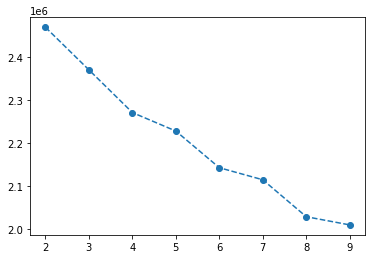

In [67]:
plt.plot(range(2,10), ssd,'o--');# from k 2 to 6 are appropriate, hence choosing k = 2 for this model is okay